In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user1-all-h5/_hand.h5
/kaggle/input/user1-all-h5/_hips.h5
/kaggle/input/user1-all-h5/_torso.h5
/kaggle/input/user1-all-h5/_bag.h5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.vis_utils import plot_model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input,Conv1D, Conv2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.vis_utils import plot_model
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
class models():
    def __init__(self, path):
        self.path = path
        
        
    def read_h5(self):
        f = h5py.File(path, 'r')
        X = f.get('inputs')
        y = f.get('labels') 
        
        X = np.array(X)
        y = np.array(y)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
        print(self.x_train.shape,self.y_train.shape)
    def draw(self):
        f1 = plt.figure(1)
        plt.title('Loss')
        plt.plot(self.r.history['loss'], label = 'loss')
        plt.plot(self.r.history['val_loss'], label = 'val_loss')
        plt.legend()
        f1.show()
        
        f2 = plt.figure(2)
        plt.plot(self.r.history['accuracy'], label = 'accuracy')
        plt.plot(self.r.history['val_accuracy'], label = 'val_accuracy')
        plt.legend()
        f2.show()    
#     def cnn_model(self):
#         K = len(set(self.y_train))
# #         print(K)
        
#         print(self.x_train.shape,self.y_train.shape)
# #         Input_shape should be a 4dim vectors as stated in the keras doc:
#         self.x_train = np.expand_dims(self.x_train, -1)
#         self.x_test = np.expand_dims(self.x_test,-1)
#         print(self.x_train.shape,self.y_train.shape)
        
#         i = Input(shape=self.x_train[0].shape)
#         print(self.x_train[0].shape)
#         x = Conv2D(16, (3,3), strides = 2, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(i)
#         x = BatchNormalization()(x)
#         x = Dropout(0.2)(x)
#         x = Flatten()(x)    
#         x = Dropout(0.2)(x)
#         x = Dense(128,activation = 'relu')(x)
#         x = BatchNormalization()(x)
#         x = Dropout(0.2)(x)
#         x = Dense(K, activation = 'softmax')(x)       
#         self.model = Model(i,x)
#         self.model.compile(optimizer = Adam(learning_rate=0.0005),
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])
        
#         self.r = self.model.fit(self.x_train, self.y_train, validation_data = (self.x_test, self.y_test), epochs = 200, batch_size = 128 )
#         print(self.model.summary())
#         return self.r
    
    def cnn_model_2(self):
        K = len(set(self.y_train))
#         print(K)
        
        print(self.x_train.shape,self.y_train.shape)
#         Input_shape should be a 4dim vectors as stated in the keras doc:
#         self.x_train = np.expand_dims(self.x_train, -1)
#         self.x_test = np.expand_dims(self.x_test,-1)
        print(self.x_train.shape,self.y_train.shape)
        
        i = Input(shape=self.x_train[0].shape)
        print(self.x_train[0].shape)
        x = Conv1D(32, 5, strides = 1, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(i)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(1,2), strides=(1,2))
        #x = Dropout(0.2)(x)
        #x = Flatten()(x)    
        #x = Dropout(0.2)(x)
        x = Conv1D(64, 3, strides = 1, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(i)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(1,2), strides=(1,2))
        #x = Dropout(0.2)(x)
        #x = Flatten()(x)  
        #x = Dropout(0.2)(x)
        x = Conv1D(128, 3, strides = 1, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(i)
#         x=layers.Reshape((500, 23), input_shape=x.shape)
        x = layers.LSTM(64, return_sequences=True)(x)
        #x = Bidirectional(LSTM(64))(x)
        x = Flatten()(x)
        x = Dense(8, activation = 'softmax')(x)
        
        self.model = Model(i,x)
        self.model.compile(optimizer = Adam(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
        
        self.r = self.model.fit(self.x_train, self.y_train, validation_data = (self.x_test, self.y_test), epochs = 200, batch_size = 128 )
        print(self.model.summary())
        return self.r
    
        
    def con_matrix(self):
        K = len(set(self.y_train))
        self.y_pred = self.model.predict(self.x_test).argmax(axis=1)
        cm = confusion_matrix(self.y_test,self.y_pred)
        self.plot_confusion_matrix(cm,list(range(K)))
    
    def plot_confusion_matrix(self, cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
            print("Normalized confusion matrix")
        else:
            print("Confusion matrix, without normalization")
        print(cm)
        f3 = plt.figure(3)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd' 
        thresh = cm.max()/2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('predicted label')
            f3.show()

(9716, 500, 22) (9716,)
(9716, 500, 22) (9716,)
(9716, 500, 22) (9716,)
(500, 22)


2022-11-08 12:49:23.869441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 12:49:23.870399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 12:49:24.150957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 12:49:24.151885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 12:49:24.152814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/200


2022-11-08 12:49:34.373317: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


76/76 [==============================] - 19s 45ms/step - loss: 1.8611 - accuracy: 0.3188 - val_loss: 1.3246 - val_accuracy: 0.4630
Epoch 2/200
76/76 [==============================] - 3s 34ms/step - loss: 1.2252 - accuracy: 0.5163 - val_loss: 1.1707 - val_accuracy: 0.4955
Epoch 3/200
76/76 [==============================] - 3s 34ms/step - loss: 1.1569 - accuracy: 0.5471 - val_loss: 1.2255 - val_accuracy: 0.5033
Epoch 4/200
76/76 [==============================] - 3s 38ms/step - loss: 1.0409 - accuracy: 0.6021 - val_loss: 1.0336 - val_accuracy: 0.6123
Epoch 5/200
76/76 [==============================] - 3s 34ms/step - loss: 0.9608 - accuracy: 0.6329 - val_loss: 0.8385 - val_accuracy: 0.6708
Epoch 6/200
76/76 [==============================] - 3s 35ms/step - loss: 0.8506 - accuracy: 0.6781 - val_loss: 0.8238 - val_accuracy: 0.6844
Epoch 7/200
76/76 [==============================] - 3s 34ms/step - loss: 0.7903 - accuracy: 0.7086 - val_loss: 0.7569 - val_accuracy: 0.7132
Epoch 8/200
76/76

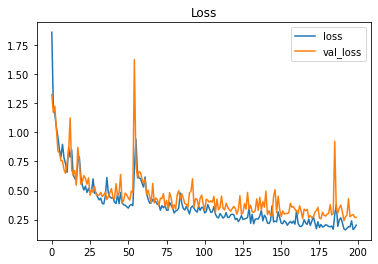

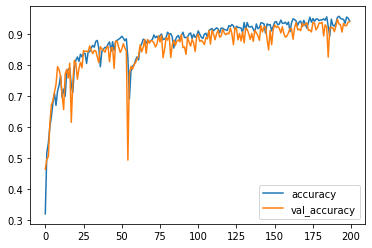

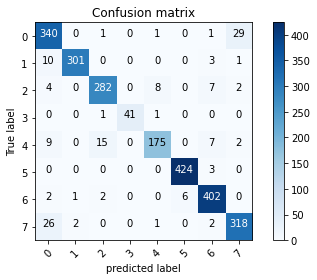

In [5]:
model_name = "cnn" 
path='/kaggle/input/user1-all-h5/_bag.h5'
motion = models(path)
motion.read_h5()
model=motion.cnn_model_2()
motion.draw()
motion.con_matrix()